In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('bank-additional-full.csv', sep = ';' ,encoding='latin-1')
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [3]:
for i in data['emp.var.rate']:
    if i == "Ocak.1":
        i = 1.01
    elif i == "Nisan.1":
        i = 1.04

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
print ('Label ranges from '+ str(data['y'].min())+' - '+ 
       str(data['y'].max()) )
data['y'].describe()

Label ranges from no - yes


count     41188
unique        2
top          no
freq      36548
Name: y, dtype: object

## Veri Bilgileri

#### Age : Yaşı - Nümerik
#### Job: İşi - Kategorik
#### Marital: Medeni hali - Kategorik
####  Education: Eğitim düzeyi - Kategorik
####  Default: Hali hazırda zaten abonemi – Kategorik
#### Housing: Konut kredisi var mı - Kategorik
#### Loan: Kişisel kredisi var mı - Kategorik
#### Contact: İletişim bilgisi - Kategorik
#### Month:  Son iletişim kurulma tarihi - Kategorik
#### Day of Week: Son iletişim kurulma günü - Kategorik
#### Duration: İletişimde kalma süresi - Nümerik
#### Campaign: Bu kampaya boyunca müşterinin iletişim kurduğu kişi sayısı  - Nümerik
#### Pdays:  Müşteri ile en son kampaya bilgilendirmesinden sonra geçen gün sayısı - Nümerik
#### Previous: Kampanya için seçili müşteriye gelmeden önce iletişime geçilme sayısı - Nümerik
#### Poutcome: Önceki pazarlama kampanyasının sonucu - Kategorik
#### Emp. Var. Rate. : İstihdam değişim oranı - Nümerik
#### Cons. Price. İdx. : Tüketici fiyat endeksi - Nümerik
#### Cons. Conf. İdx. :  Tüketici güven endeksi - Nümerik
#### Euribor3m: 3 aylık Euro Bankalararası Teklif Oranı, Avro Bölgesi bankalarının avro toptan para piyasasındaki diğer bankalara teminatsız fonlar vermek için sunduğu ortalama faiz oranlarına dayanan Avrupa Para Piyasaları Enstitüsü tarafından yayınlanan bir referans oranıdır. - Nümerik
#### Nr. Employed: Çalışan sayısı - Nümerik
#### Y: Vadeli mevduat hesabına abone olup olmama durumu – Kategorik

In [6]:
print('Banka datası orjinal halinin uzunluğu: '+ str(len(data)))
data_df_NoMissing= data.dropna()

print('Banka datası missing dataların atıldıktan sonraki halinin uzunluğu: '+ str(len(data_df_NoMissing)))

Banka datası orjinal halinin uzunluğu: 41188
Banka datası missing dataların atıldıktan sonraki halinin uzunluğu: 41188


In [7]:
print('Veri setinde bulunan özelliklerinin veri tipleri') 
data.info()

Veri setinde bulunan özelliklerinin veri tipleri
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dt

In [8]:
print("Örnek Sayısı:",len(data))
print("Kolon Sayısı:",len(data.columns))

Örnek Sayısı: 41188
Kolon Sayısı: 21


In [9]:
print(data['emp.var.rate'].unique())

[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]


# Bölüm III Temel Tanımlayıcı İstatistikler

In [10]:
print("Veri setinde ki bazı özelliklerde bulunan istatistiksel sonuçlar.")
data.describe()

Veri setinde ki bazı özelliklerde bulunan istatistiksel sonuçlar.


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


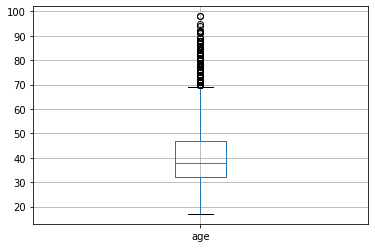

In [11]:
data['age'].plot.box(grid='True')

In [12]:
print('1. Çeyreklik: ', data['age'].quantile(q = 0.25))
print('2. Çeyreklik: ', data['age'].quantile(q = 0.50))
print('3. Çeyreklik: ', data['age'].quantile(q = 0.75))
print('4. Çeyreklik: ', data['age'].quantile(q = 1.00))
print('Aykırı yaş değerleri: ', data['age'].quantile(q = 0.75) + 1.5*(data['age'].quantile(q = 0.75) - data['age'].quantile(q = 0.25)), 'un üstündedir')
print('Yaş özelliği için toplam aykırı değer sayısı: ', data[data['age'] > 69.6]['age'].count())

1. Çeyreklik:  32.0
2. Çeyreklik:  38.0
3. Çeyreklik:  47.0
4. Çeyreklik:  98.0
Aykırı yaş değerleri:  69.5 un üstündedir
Yaş özelliği için toplam aykırı değer sayısı:  469


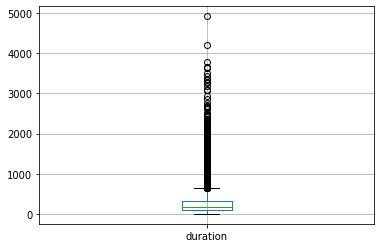

In [13]:
data['duration'].plot.box(grid='True')

In [14]:
print('1. Çeyreklik: ', data['duration'].quantile(q = 0.25))
print('2. Çeyreklik: ', data['duration'].quantile(q = 0.50))
print('3. Çeyreklik: ', data['duration'].quantile(q = 0.75))
print('4. Çeyreklik: ', data['duration'].quantile(q = 1.00))
print('Aykırı arama süresi değerleri: ', data['duration'].quantile(q = 0.75) + 1.5*(data['duration'].quantile(q = 0.75) - data['duration'].quantile(q = 0.25)), 'un üstündedir')
print('Arama süresi özelliği için toplam aykırı değer sayısı: ', data[data['duration'] > 644.5]['duration'].count())

1. Çeyreklik:  102.0
2. Çeyreklik:  180.0
3. Çeyreklik:  319.0
4. Çeyreklik:  4918.0
Aykırı arama süresi değerleri:  644.5 un üstündedir
Arama süresi özelliği için toplam aykırı değer sayısı:  2963


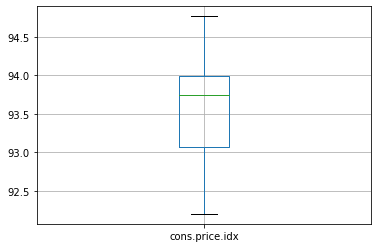

In [15]:
data['cons.price.idx'].plot.box(grid='True')

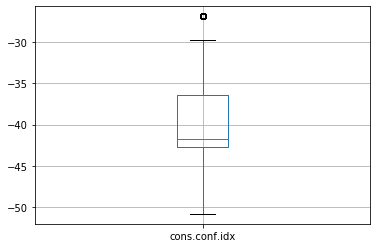

In [16]:
data['cons.conf.idx'].plot.box(grid='True')

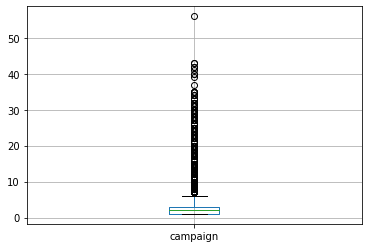

In [17]:
data['campaign'].plot.box(grid='True')

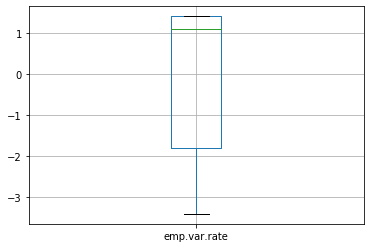

In [18]:
data['emp.var.rate'].plot.box(grid='True')

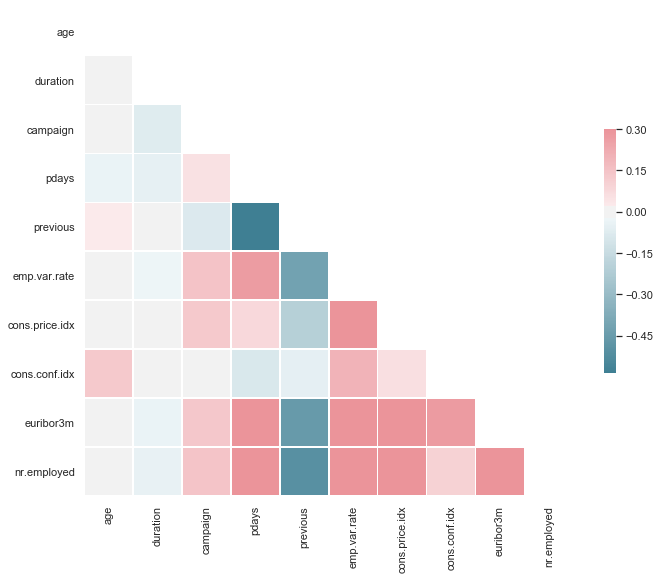

In [19]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Bölüm IV Veri Yönetimi İşlemleri

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
labelencoder_X = LabelEncoder()

#Bölüm 3 de elde edilen aykırı değerler ile data temizleniyor.

filter = data["age"] < 69.5
data.where(filter, inplace = True)

filter = data["duration"] < 644.5
data.where(filter, inplace = True)
data.dropna(how='any', inplace = True)

def changeToCategoric(data, attribute):
    quantile1 = data[attribute].quantile(q = 0.25)
    quantile2 = data[attribute].quantile(q = 0.50)
    quantile3 = data[attribute].quantile(q = 0.75)
    data.loc[(data[attribute] <= quantile1), attribute] = 1
    data.loc[(data[attribute] > quantile1) & (data[attribute] <= quantile2), attribute] = 2
    data.loc[(data[attribute] > quantile2) & (data[attribute] <= quantile3), attribute] = 3
    data.loc[(data[attribute] > quantile3), attribute] = 4 
    return data

def labelEncoder(data, attribute):
    labelencoder_X.fit(data[attribute])
    data[attribute] = labelencoder_X.transform(data[attribute])

changeToCategoric(data,'age')
changeToCategoric(data,'duration')
changeToCategoric(data,'campaign')

labelEncoder(data, 'job')
labelEncoder(data, 'loan')
labelEncoder(data, 'contact')
labelEncoder(data, 'month')
labelEncoder(data, 'day_of_week')
labelEncoder(data, 'marital')
labelEncoder(data, 'education')
labelEncoder(data, 'housing')
labelEncoder(data, 'month')
labelEncoder(data, 'default')
labelEncoder(data, 'poutcome')
labelEncoder(data, 'euribor3m')
labelEncoder(data, 'y')

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4.0,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,286,5191.0,0
1,4.0,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,286,5191.0,0
2,2.0,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,286,5191.0,0
3,3.0,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,286,5191.0,0
4,4.0,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,286,5191.0,0


# Veri Görselleştirilmesi

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

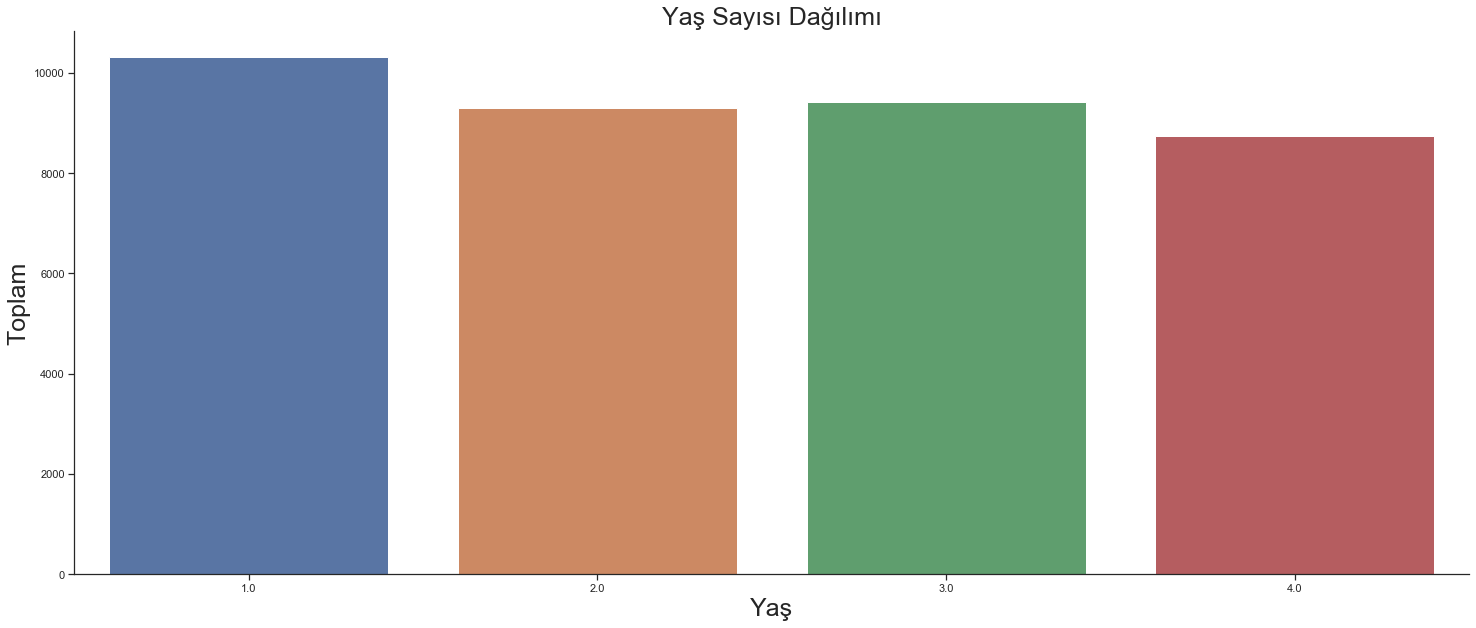

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(x = 'age', data = data)
ax.set_xlabel('Yaş', fontsize=25)
ax.set_ylabel('Toplam', fontsize=25)
ax.set_title('Yaş Sayısı Dağılımı', fontsize=25)
sns.despine()

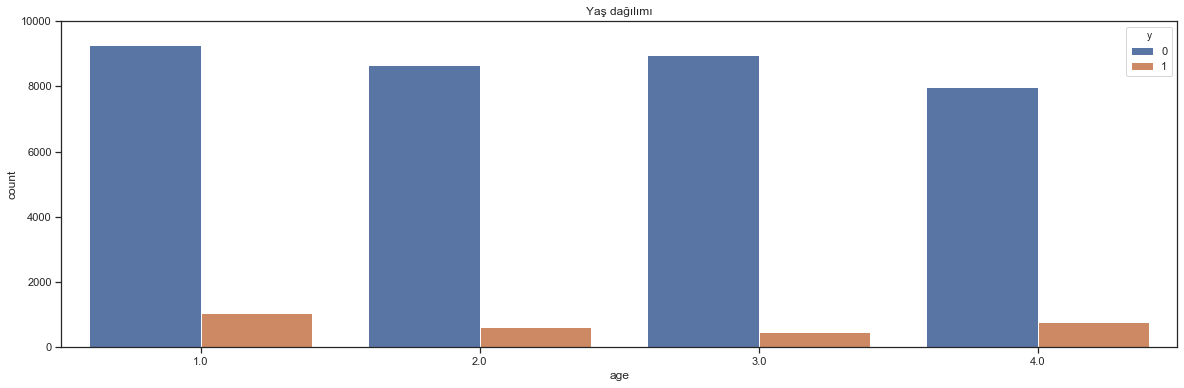

In [23]:
fig, ax=plt.subplots(figsize=(20,6))
sns.countplot(x='age', data=data, hue='y')
ax.set_ylim(0,10000)
plt.title("Yaş dağılımı")
plt.show()

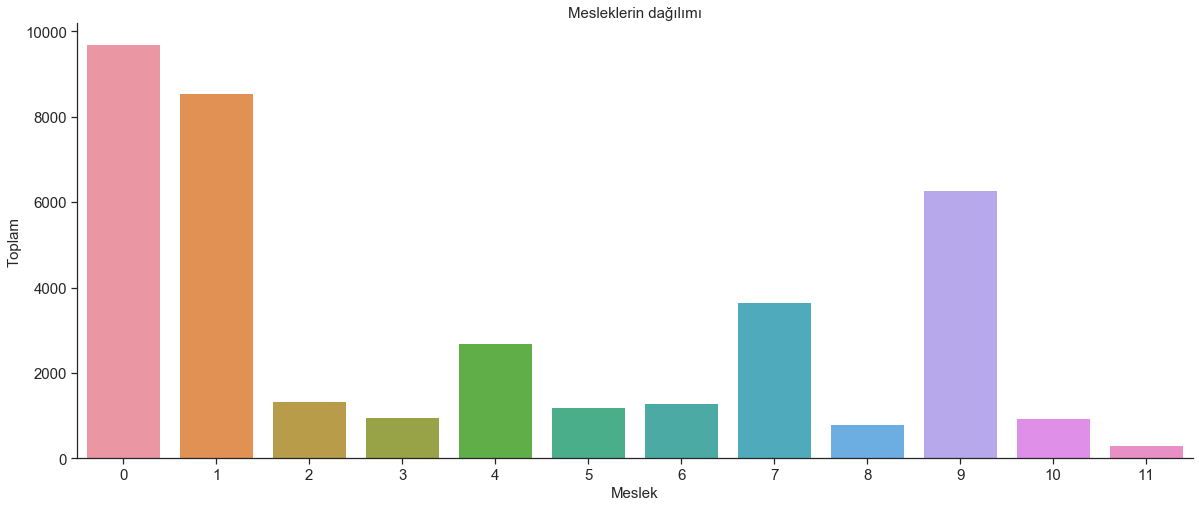

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = data)
ax.set_xlabel('Meslek', fontsize=15)
ax.set_ylabel('Toplam', fontsize=15)
ax.set_title('Mesleklerin dağılımı', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

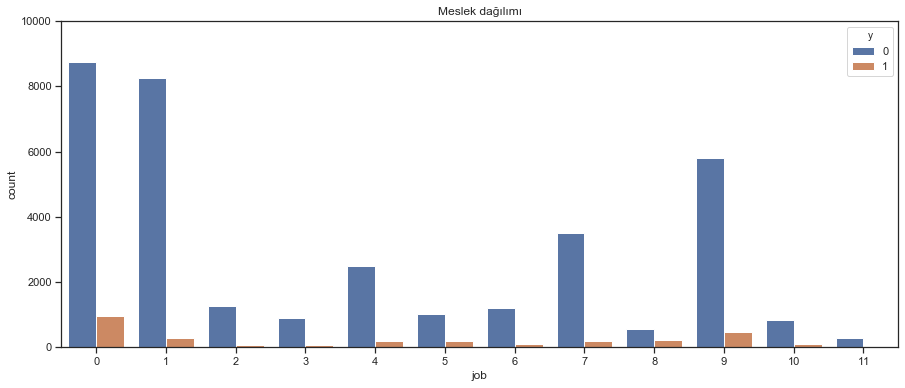

In [25]:
fig, ax=plt.subplots(figsize=(15,6))
sns.countplot(x='job', data=data, hue='y')
ax.set_ylim(0,10000)
plt.title("Meslek dağılımı")
plt.show()

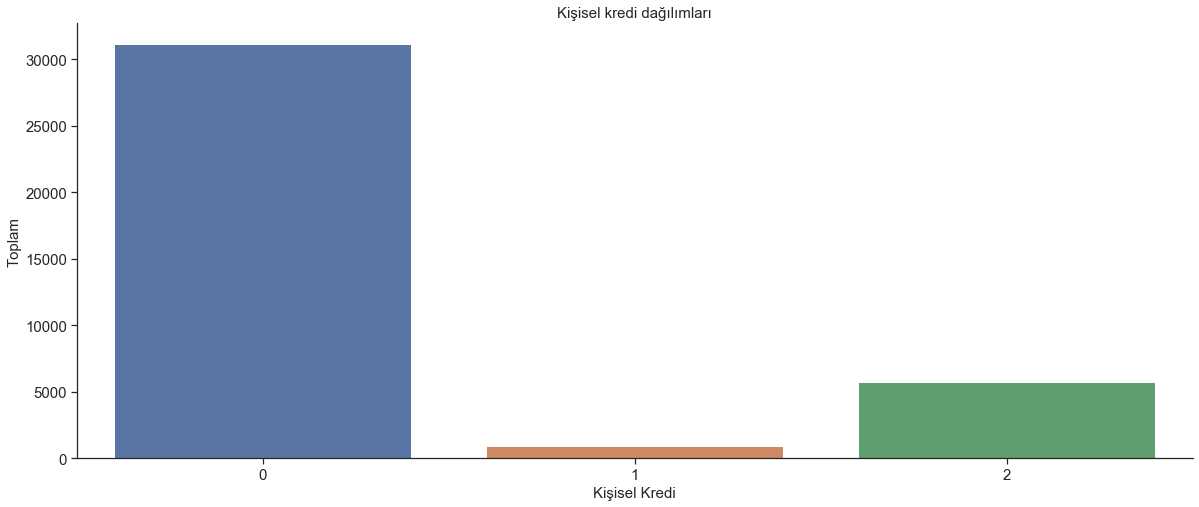

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'loan', data = data)
ax.set_xlabel('Kişisel Kredi', fontsize=15)
ax.set_ylabel('Toplam', fontsize=15)
ax.set_title('Kişisel kredi dağılımları', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

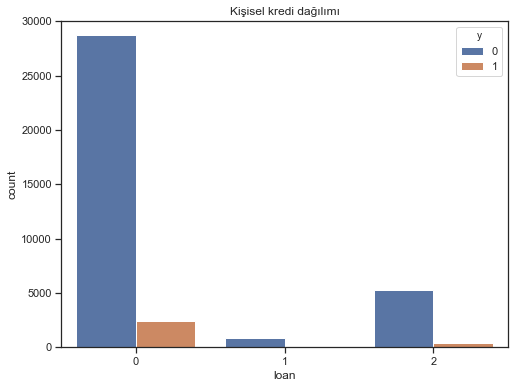

In [27]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='loan', data=data, hue='y')
ax.set_ylim(0,30000)
plt.title("Kişisel kredi dağılımı")
plt.show()

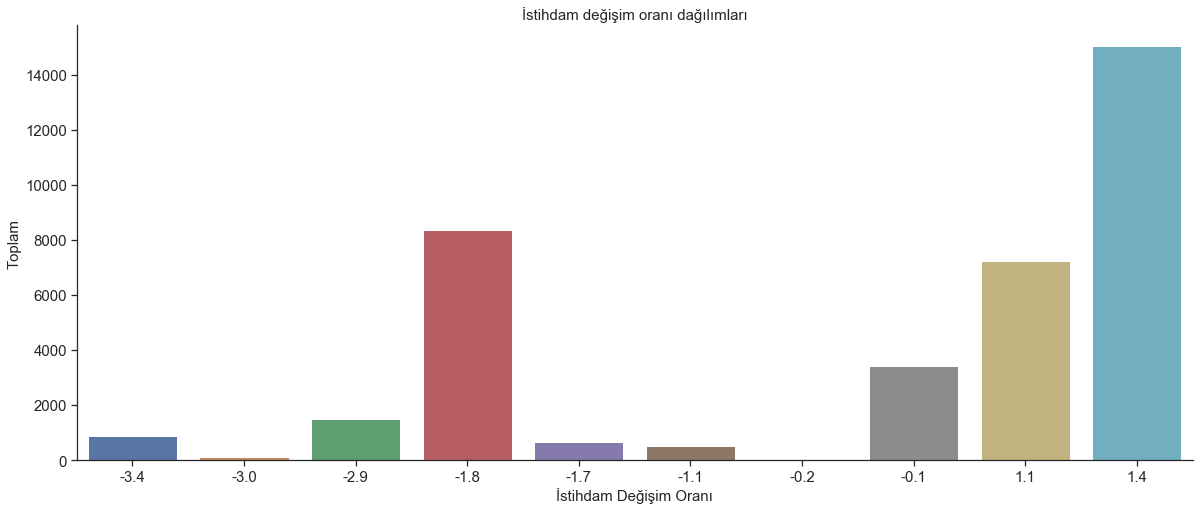

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'emp.var.rate', data = data)
ax.set_xlabel('İstihdam Değişim Oranı', fontsize=15)
ax.set_ylabel('Toplam', fontsize=15)
ax.set_title('İstihdam değişim oranı dağılımları', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

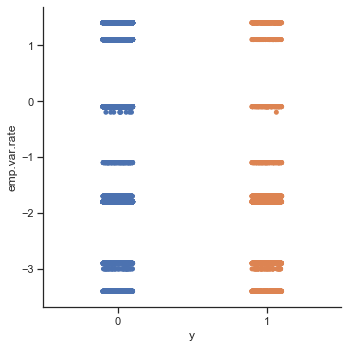

In [29]:
sns.catplot(x="y",y="emp.var.rate",data=data)

# Bölüm VI Makine Öğrenimi (ML) Uygulaması: Model Seçimi ve Değerlendirme

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data_final= data.copy()
y = data_final['y']
data_final.drop(['y'],axis=1,inplace=True)
data_final.shape

(37784, 20)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data_final, y, random_state = 0)

clf = RandomForestClassifier(max_features = 8, random_state = 0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [37]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier = DecisionTreeClassifier()
DecisionTreeClassifier = DecisionTreeClassifier.fit(X_train,y_train)
from sklearn.model_selection import cross_val_score

In [38]:
acc = cross_val_score(estimator = DecisionTreeClassifier, X=X_train, y=y_train , cv = 5)
print ("DecisionTreeClassifier için Başarıların ortalaması:")
print(acc.mean())
print ("Başarıların Standart Sapması:")
print(acc.std())

DecisionTreeClassifier için Başarıların ortalaması:
0.9155550783628303
Başarıların Standart Sapması:
0.0029750163650597485


In [39]:
#k-fold cross validation 
acc = cross_val_score(estimator = clf, X=X_train, y=y_train , cv = 5)
print ("Random forest için Başarıların ortalaması:")
print(acc.mean())
print ("Başarıların Standart Sapması:")
print(acc.std())

Random forest için Başarıların ortalaması:
0.9340110916126158
Başarıların Standart Sapması:
0.0017345456772399949


In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [41]:
acc = cross_val_score(estimator = knn, X=X_train, y=y_train , cv = 5)
print ("KNN için Başarıların ortalaması:")
print(acc.mean())
print ("Başarıların Standart Sapması:")
print(acc.std())

KNN için Başarıların ortalaması:
0.9332699089213474
Başarıların Standart Sapması:
0.0011067479246265426


In [42]:
#En iyi parametrelerin bulunması için grid search çalışıyor.
from sklearn.model_selection import GridSearchCV

grid_params = {'n_neighbors': [2, 5, 15],
              'weights': ['uniform', 'distance'],
              'metric':['euclidean', 'manhattan']}


gs = GridSearchCV(estimator=knn,param_grid= grid_params,scoring= "accuracy")

grid_search = gs.fit(X_train,y_train)
bestResult = grid_search.best_score_
bestParameters = grid_search.best_params_
print ("Best Result - (R-square):\n",bestResult)
print ("Best Parameters:\n",bestParameters)

Best Result - (R-square):
 0.9329169313289576
Best Parameters:
 {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}


In [ ]:
grid_params = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

gs = GridSearchCV(estimator=clf,param_grid= grid_params,scoring= "accuracy")

grid_search = gs.fit(X_train,y_train)
bestResult = grid_search.best_score_
bestParameters = grid_search.best_params_
print ("Best Result - (R-square):\n",bestResult)
print ("Best Parameters:\n",bestParameters)

# Feature selection

In [34]:
import pandas as pd
import numpy as np

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(data_final,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=data_final.columns)

[0.05712243 0.07241708 0.04200469 0.06680235 0.00997252 0.03254854
 0.02245814 0.01368766 0.01875402 0.06342181 0.11937723 0.05662681
 0.06119629 0.01693575 0.04319448 0.0337257  0.02334748 0.03585991
 0.12561548 0.08493161]


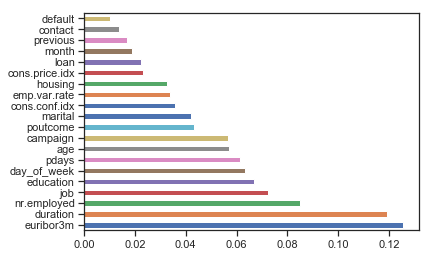

In [35]:
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [136]:
print(clf.feature_importances_)
feat_importances = pd.Series(clf.feature_importances_, index=data_final.columns)

[0.05258094 0.07253409 0.0372146  0.06337665 0.0103093  0.03149271
 0.02034857 0.01185641 0.02299975 0.05604318 0.11653097 0.05235833
 0.03621264 0.01838284 0.02619902 0.02364189 0.0286583  0.02262899
 0.19472596 0.10190483]


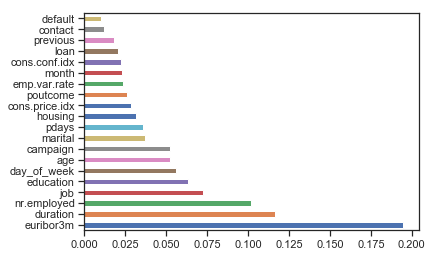

In [137]:
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
X = pd.DataFrame(data_final, columns = ['euribor3m','duration','job','education','nr.employed','day_of_week','pdays','age','campaign','emp.var.rate'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


In [45]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 10, metric = 'manhattan', weights = 'distance')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='distance')

In [36]:
'''
KNN
Best Parameters:
 {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}

Random forest
Best Parameters:
 {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
'''




#RandomForest
random_forest = RandomForestClassifier(max_features = 'auto', criterion = 'entropy', max_depth = 8,n_estimators = 500)
random_forest.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
acc = cross_val_score(estimator = random_forest, X=X_train, y=y_train , cv = 5)
print ("Random forest için Başarıların ortalaması:")
print(acc.mean())
print ("Başarıların Standart Sapması:")
print(acc.std())

Random forest için Başarıların ortalaması:
0.9412096657490373
Başarıların Standart Sapması:
0.0008167272070702033


In [46]:
acc = cross_val_score(estimator = knn, X=X_train, y=y_train , cv = 5)
print ("KNN için Başarıların ortalaması:")
print(acc.mean())
print ("Başarıların Standart Sapması:")
print(acc.std())

KNN için Başarıların ortalaması:
0.9334466181605079
Başarıların Standart Sapması:
0.0028217999922128707


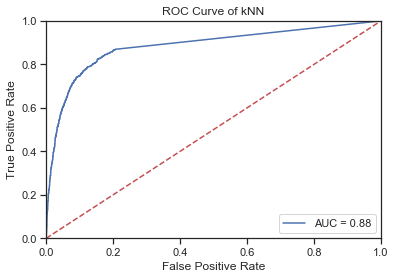

In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

y_scores = knn.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

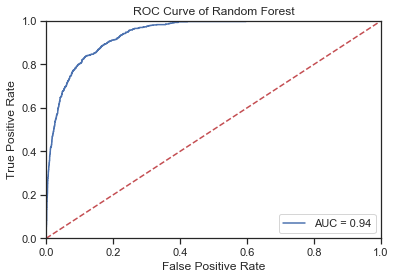

In [48]:
y_scores2 = random_forest.predict_proba(X_test)


fpr, tpr, threshold = roc_curve(y_test, y_scores2[:, 1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.show()